## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
tumor_volumes = combined_df['Tumor Volume (mm3)']

In [4]:
mean_summary = combined_df.groupby(combined_df["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

In [5]:
median_summary = combined_df.groupby(combined_df["Drug Regimen"]).median()["Tumor Volume (mm3)"]

In [6]:
variance_summary = combined_df.groupby(combined_df["Drug Regimen"]).var()["Tumor Volume (mm3)"]

In [7]:
stdv_summary = combined_df.groupby(combined_df["Drug Regimen"]).std()["Tumor Volume (mm3)"]

In [8]:
sem_summary = combined_df.groupby(combined_df["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [9]:
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_summary,
                           "Median Tumor Volume": median_summary,
                           "Variance": variance_summary,
                           "Standard Deviation": stdv_summary,
                           "SEM": sem_summary
                            })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#x-axis to be drug regimens
#y-axis can be count of mice in each drug regimen
pandas_plot = combined_df.groupby("Drug Regimen")
count_drugs = pandas_plot["Drug Regimen"].count()
count_drugs


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

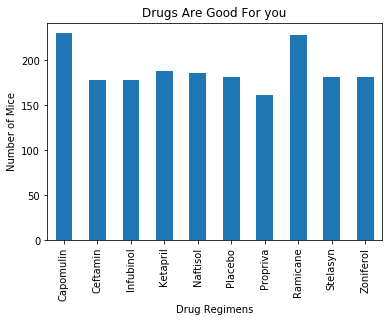

<Figure size 432x288 with 0 Axes>

In [11]:
# Create a bar chart based off of the group series from before
count_chart = count_drugs.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimens")
count_chart.set_ylabel("Number of Mice")
count_chart.set_title("Drugs Are Good For you")

plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Drugs are Fun')

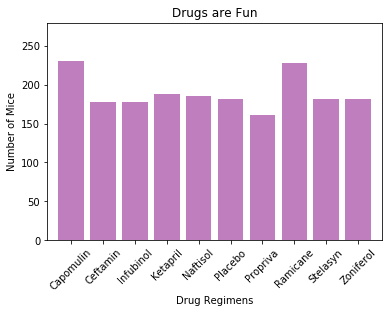

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#x-axis to be drug regimens
#y-axis can be count of mice in each drug regimen
x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
counts = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
plt.bar(x_axis, counts, color='purple', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(plt.ylim(0, max(counts)+50))
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.title("Drugs are Fun")


## Pie plots

In [13]:
capomulin_df = combined_df.loc[(combined_df["Drug Regimen"] == "Capomulin")]
ceftamin_df = combined_df.loc[(combined_df["Drug Regimen"] == "Ceftamin")]
infubinol_df = combined_df.loc[(combined_df["Drug Regimen"] == "Infubinol")]
ketapril_df = combined_df.loc[(combined_df["Drug Regimen"] == "Ketapril")]
naftisol_df = combined_df.loc[(combined_df["Drug Regimen"] == "Naftisol")]
placebo_df = combined_df.loc[(combined_df["Drug Regimen"] == "Placebo")]
propriva_df = combined_df.loc[(combined_df["Drug Regimen"] == "Propriva")]
ramicane_df = combined_df.loc[(combined_df["Drug Regimen"] == "Ramicane")]
stelasyn_df = combined_df.loc[(combined_df["Drug Regimen"] == "Stelasyn")]
zoniferol_df = combined_df.loc[(combined_df["Drug Regimen"] == "Zoniferol")]



In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_pie_chart = combined_df.groupby("Sex")
count_sex = pandas_pie_chart["Sex"].count()
count_sex

Sex
Female    935
Male      958
Name: Sex, dtype: int64

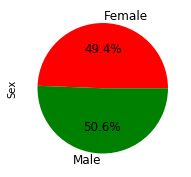

In [15]:
pandas_pie_chart = count_sex.plot(kind='pie', labels=['Female', 'Male'], colors=['r','g'], autopct='%1.1f%%', fontsize=12, figsize=(3, 3))



(-1.1003126286782299,
 1.1065652022428256,
 -1.2076939577793158,
 1.1101719390349558)

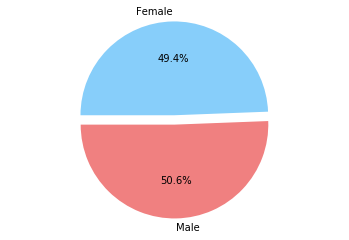

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
pie_values = [958, 935]
colors = ["lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the section from the others
explode = (0.1, 0)
plt.pie(pie_values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.axis("equal")

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#find the 4 most promising drug regimens based on tumor volume
tumor_comparison = combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_comparison.sort_values(ascending=True)


Drug Regimen
Ramicane     40.216745
Capomulin    40.675741
Propriva     52.322552
Ceftamin     52.591172
Infubinol    52.884795
Zoniferol    53.236507
Placebo      54.033581
Stelasyn     54.233149
Naftisol     54.331565
Ketapril     55.235638
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#grab the top four drug regimens: Ramicane Capomulin Propriva Ceftamin 
four_drug_df = combined_df.loc[(combined_df["Drug Regimen"] == "Ramicane") |(combined_df["Drug Regimen"] == "Capomulin") |(combined_df["Drug Regimen"] == "Infubinol") |(combined_df["Drug Regimen"] == "Ceftamin"), :]
four_drug_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
four_drug__timepoint45 = four_drug_df.loc[(four_drug_df["Timepoint"] == 45), :]
four_drug__timepoint45.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
four_drug__ramicane = four_drug__timepoint45.loc[(four_drug__timepoint45["Drug Regimen"] == "Ramicane"), :]
four_drug__ramicane.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
tumor_size_ramicane = four_drug__ramicane["Tumor Volume (mm3)"]

quartiles = tumor_size_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 30.981175224999998
The upper quartile of Tumor Volume is: 38.508305307499995
The interquartile range of Tumor Volume is: 7.527130082499998
The the median of Tumor Volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [22]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
tumor_size_infubinol = four_drug__ramicane["Tumor Volume (mm3)"]

quartiles = tumor_size_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 30.981175224999998
The upper quartile of Tumor Volume is: 38.508305307499995
The interquartile range of Tumor Volume is: 7.527130082499998
The the median of Tumor Volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [23]:
tumor_size_capomulin = four_drug__ramicane["Tumor Volume (mm3)"]

quartiles = tumor_size_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 30.981175224999998
The upper quartile of Tumor Volume is: 38.508305307499995
The interquartile range of Tumor Volume is: 7.527130082499998
The the median of Tumor Volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [24]:
tumor_size_ceftamin = four_drug__ramicane["Tumor Volume (mm3)"]

quartiles = tumor_size_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 30.981175224999998
The upper quartile of Tumor Volume is: 38.508305307499995
The interquartile range of Tumor Volume is: 7.527130082499998
The the median of Tumor Volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


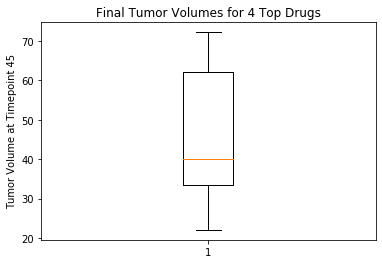

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = four_drug__timepoint45["Tumor Volume (mm3)"]
tumor_vol

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes for 4 Top Drugs')
ax1.set_ylabel('Tumor Volume at Timepoint 45')
ax1.boxplot(tumor_vol)
plt.show()

## Line and scatter plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#chose one mouse
mouse_i557 = capomulin_df.loc[(capomulin_df["Mouse ID"] == "i557"), :] 
#| [: , (capomulin_df["Tumor Volume (mm3)"])]
timepoint_index = mouse_i557.set_index("Timepoint")
timepoint_index
#grab the timepoint range for it
#generate line plot
mouse_i557_tumor_volume = timepoint_index.loc[:, ["Tumor Volume (mm3)"]]
mouse_i557_tumor_volume[["Tumor Volume (mm3)"]]
mouse_i557_tumor_volume


,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,42.261665
10,42.992077
15,43.529876
20,43.967895
25,44.596219
30,45.261384
35,45.941949
40,46.821070


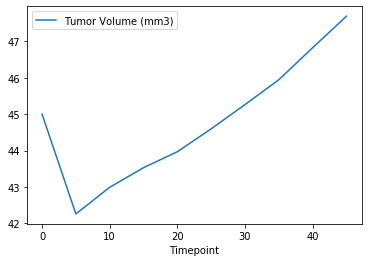

<Figure size 432x288 with 0 Axes>

In [27]:
line_chart = mouse_i557_tumor_volume.plot(kind='line')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Timepoint")
count_chart.set_ylabel("Tumor Size(mm3)")
count_chart.set_title("Mouse i557 on Capomulin")

plt.show()
plt.tight_layout()

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [29]:
mouse_id = capomulin_df.groupby("Mouse ID").mean()
mouse_id
mouse_weight = mouse_id[["Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight.head()

#mouse_tumor_avg = mouse_id.["Tumor Size(mm3)").mean()
#mouse_tumor_avg

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


In [30]:
weight = mouse_weight.iloc[:,0]
volume = mouse_weight.iloc[:,1]

Text(0.5, 1.0, 'Relationship of Mouse Weight & Tumor Volume for Capomulin')

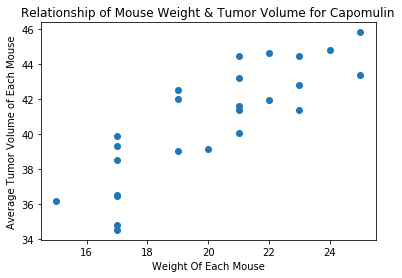

In [31]:
plt.scatter(weight,volume)
plt.xlabel('Weight Of Each Mouse')
plt.ylabel('Average Tumor Volume of Each Mouse')
plt.title("Relationship of Mouse Weight & Tumor Volume for Capomulin")

In [32]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation between both factors is 0.84


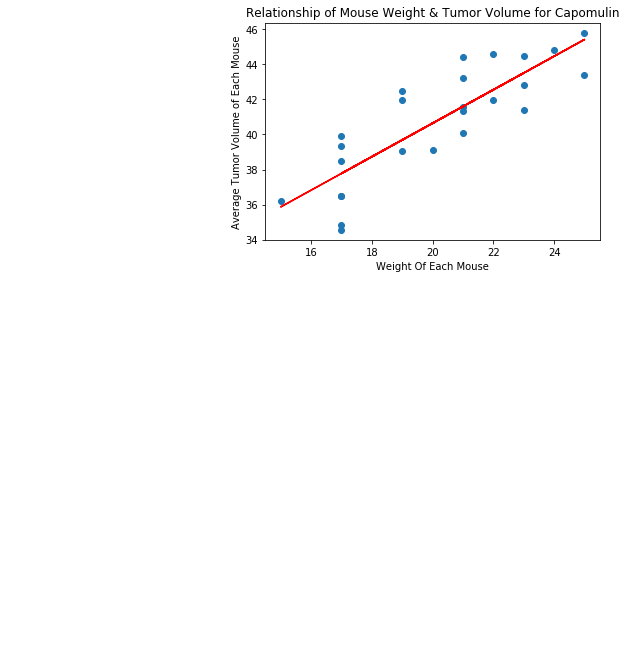

In [33]:
#x_values = housing_data['RM']
#y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel('Weight Of Each Mouse')
plt.ylabel('Average Tumor Volume of Each Mouse')
plt.title("Relationship of Mouse Weight & Tumor Volume for Capomulin")
plt.show()